In [0]:
# 사용할 라이브러리 불러오기
import numpy as np

# 숫자 -> One-hot Vector 를 위한 라이브러리
from keras.utils import np_utils

# MNIST Dataset을 가져오기 위한 라이브러리
from keras.datasets import mnist

# 순차적인 모델을 만들기 위한 Sequential 함수
from keras.models import Sequential

# 필요한 층들을 가지고 있는 layers 라이브러리
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten

# Google Colab에서 이미지를 보기 위한 cv2_imshow 함수
from google.colab.patches import cv2_imshow 

Using TensorFlow backend.


In [0]:
# Dataset 구성

# MNIST Dataset이 저장되어 있는 어딘가에서 MNIST Dataset을 가져옵니다
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Training Set의 모양을 한번 봅시다
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))

# 한 번 Dataset에 무엇이 들어있는지 Test Set의 10개만 봅시다
for i in range(10):
  cv2_imshow(x_test[i])

11493376/11490434 [==============================] - 1s 0us/step
x_train : (60000, 28, 28)
y_train : (60000,)


In [0]:
# Dataset 전처리

# Loss의 스케일 조정을 위해 0 ~ 255 -> 0 ~ 1 범위로 만들어줍니다
# CNN은 2D (28*28) 그대로 입력하지만 channel로 인해 차원을 추가해야 합니다.
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0

# One-Hot Encoding (숫자 -> One-Hot Vector) 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('y_train :', np.shape(y_train))

# Training Set 60000개중 10000개를 떼서 Validation Set을 만들어줍시다 
x_valid = x_train[50000:]
y_valid = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

print('x_train :', np.shape(x_train))
print('x_valid :', np.shape(x_valid))

y_train : (60000, 10)
x_train : (50000, 28, 28, 1)
x_valid : (10000, 28, 28, 1)


In [0]:
# 모델 구성하기

# 너비, 높이, 채널(RGB) 설정
width = 28
height = 28
channel = 1

# 순차적 모델을 만들기 위한 Sequential() 함수
model = Sequential(name='MNIST_CNN')

# filters : Kernel의 갯수 / kernel_size : Kernel 크기
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(width, height, channel)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())

# 두 층 MLP
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

# MLP 층이 훨씬 가중치를 많이 필요로 한다는 것을 확인할 수 있습니다.

W0904 09:26:18.263401 139735830140800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0904 09:26:18.307159 139735830140800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 09:26:18.315181 139735830140800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0904 09:26:18.360210 139735830140800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Model: "MNIST_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0 

In [0]:
# 모델 학습과정 설정하기

# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, SGD를 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 띄울까를 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=10,
                 batch_size=32,
                 validation_data=(x_valid, y_valid))

W0904 09:27:40.567057 139735830140800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 09:27:40.605018 139735830140800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0904 09:27:40.735448 139735830140800 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0904 09:27:40.950257 139735830140800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecate

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 23s 454us/step - loss: 0.5391 - acc: 0.8289 - val_loss: 0.1222 - val_acc: 0.9628
Epoch 2/10
50000/50000 [==============================] - 16s 326us/step - loss: 0.0969 - acc: 0.9704 - val_loss: 0.0753 - val_acc: 0.9775
Epoch 3/10
50000/50000 [==============================] - 16s 325us/step - loss: 0.0659 - acc: 0.9797 - val_loss: 0.0668 - val_acc: 0.9813
Epoch 4/10
50000/50000 [==============================] - 16s 323us/step - loss: 0.0510 - acc: 0.9840 - val_loss: 0.0829 - val_acc: 0.9740
Epoch 5/10
50000/50000 [==============================] - 16s 324us/step - loss: 0.0415 - acc: 0.9870 - val_loss: 0.0591 - val_acc: 0.9819
Epoch 6/10
50000/50000 [==============================] - 16s 326us/step - loss: 0.0348 - acc: 0.9885 - val_loss: 0.0501 - val_acc: 0.9854
Epoch 7/10
50000/50000 [==============================] - 16s 323us/step - loss: 0.0292 - acc: 0.9902 - val_loss: 0.

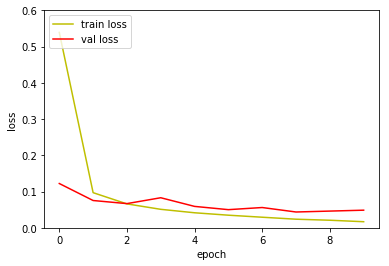

In [0]:
# 그래프를 그리기 위한 matplotlib 라이브러리
import matplotlib.pyplot as plt

# Training Loss VS Validation Loss 비교를 위한 그래프 그리기 
plt.plot(hist.history['loss'], 'y', label='train loss')
plt.plot(hist.history['val_loss'], 'r', label='val loss')

# y축 범위 설정
plt.ylim([0.0, 0.6])

# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('loss')

# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')

plt.show()

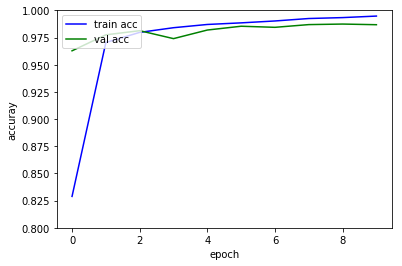

In [0]:
# Training Accuracy VS Validation Accuracy 비교를 위한 그래프 그리기 
plt.plot(hist.history['acc'], 'b', label='train acc')
plt.plot(hist.history['val_acc'], 'g', label='val acc')

# y축 범위 설정
plt.ylim([0.8, 1.0])

# 각 축의 이름 정하기
plt.xlabel('epoch')
plt.ylabel('accuracy')

# 각 그래프의 설명 위치 설정 후 표시
plt.legend(loc='upper left')

# 그래프 그리기
plt.show()

In [0]:
#모델 평가
loss_and_acc = model.evaluate(x_test, y_test, batch_size=32)
print('Test set Loss and Accuracy')
print(loss_and_acc)

10000/10000 [==============================] - 1s 111us/step
Test set Loss and Accuracy
[0.036314251912328475, 0.9893]


In [0]:
# 모델을 직접 써봅시다

# Test Set 20개를 맞춰봅시다
for i in range(20):
  
  # predict()를 통해 입력을 모델에 통과시킬 수 있습니다
  # output은 softmax의 출력으로 10개의 값을 갖습니다
  output = model.predict(x_test[i].reshape(1,28, 28, 1))
  # predict()의 입력은 맨 앞에 차원을 하나 추가해주어야 합니다. 나중에 배웁니다
  
  # 이미지를 보기 위해 다시 사각형으로 만들고, 다시 255를 곱해줍니다
  cv2_imshow(x_test[i].reshape(28, 28) * 255)
  
  # argmax() 함수는 가장 최댓값을 갖는 Index(번째)를 찾아줍니다
  print('예상 숫자 분류 :', np.argmax(output))
  
  # 모델의 출력과 실제 값을 비교 후 다르면 문장을 출력합니다
  if np.argmax(output) != np.argmax(y_test[i]) :
    print('틀렸습니다!')

예상 숫자 분류 : 7


예상 숫자 분류 : 2


예상 숫자 분류 : 1


예상 숫자 분류 : 0


예상 숫자 분류 : 4


예상 숫자 분류 : 1


예상 숫자 분류 : 4


예상 숫자 분류 : 9


예상 숫자 분류 : 5


예상 숫자 분류 : 9


예상 숫자 분류 : 0


예상 숫자 분류 : 6


예상 숫자 분류 : 9


예상 숫자 분류 : 0


예상 숫자 분류 : 1


예상 숫자 분류 : 5


예상 숫자 분류 : 9


예상 숫자 분류 : 7


예상 숫자 분류 : 3


예상 숫자 분류 : 4


In [0]:
# 본인의 구글 드라이브 → 지금 실행중인 코드

# google.colab.drive : 구글 드라이브에서 파일을 가져오기 위한 코드를 담고 있다.
from google.colab import drive

# 본인의 구글 드라이브를 '/gdrive' 라는 경로로 하여 쓸 수 있다.
drive.mount('/gdrive', force_remount=True)

In [0]:
# 모델은 h5 파일 형태로 저장됩니다
model.save('/gdrive/My Drive/MNIST_CNN.h5')

# 모델을 불러오기 위해 지워줍니다
del model

# 저장되어 있는 모델을 불러오기 위한 load_model 함수
from keras.models import load_model

# 'model' 에 해당 모델을 불러옵니다
model = load_model('/gdrive/My Drive/MNIST_CNN.h5')